In [2]:
import pandas as pd
import numpy as np
import os
import calendar
import matplotlib.pyplot as plt

### task one merging 12 months of data into a single file


In [3]:
 df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files =[file for file in os.listdir('./Sales_Data')]

allmonths=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    allmonths=pd.concat([allmonths,df])
allmonths.to_csv("alldata.csv",index=False)
    

In [4]:
alldata=pd.read_csv("alldata.csv")
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### clean data

### Here we are going to clean data by droping the Nan values and also deleting the 'or' word from the order date


In [5]:
nandf= alldata[alldata.isna().any(axis=1)]
nandf
alldata=alldata.dropna(how='all')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### find or and delete it

In [6]:
alldata=alldata[alldata['Order Date'].str[0:2]!= 'Or']
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### convert columns to correct type

In [7]:
alldata['Quantity Ordered']= pd.to_numeric(alldata['Quantity Ordered']) #make in
alldata['Price Each']=pd.to_numeric(alldata['Price Each']) #make float
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [8]:
### augment data with other colums
### 1.add month column- alldata we take the order and convert the first two char (04)into strings
### 2.convert the months to numerical values than string

## Task1.What was the best month for sales? How much was earned that month?

### add month column

In [8]:
alldata['Month']=alldata['Order Date'].str[0:2]
alldata['Month']=alldata['Month'].astype('int32')
#alldata['Month'] = alldata['Month'].apply(lambda x: calendar.month_abbr[x])
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### add a sales column

In [9]:
alldata['sales']=alldata['Quantity Ordered'] * alldata['Price Each']

alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
results = alldata.groupby('Month').sum()
#.sort_values(by='Month')
results

,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [11]:
resultf = alldata.groupby('Month').sum()
format_dict= {'sales':'${0:,.0f}'}
(resultf.style.format(format_dict).bar(color='red',vmin=100_000,subset=['sales'],align='zero'))



,Quantity Ordered,Price Each,sales
Month,,,
1,10903,1811768.380000,"$1,822,257"
2,13449,2188884.720000,"$2,202,022"
3,17005,2791207.830000,"$2,807,100"
4,20558,3367671.020000,"$3,390,670"
5,18667,3135125.130000,"$3,152,607"
6,15253,2562025.610000,"$2,577,802"
7,16072,2632539.560000,"$2,647,776"
8,13448,2230345.420000,"$2,244,468"
9,13109,2084992.090000,"$2,097,560"


### plot the graph

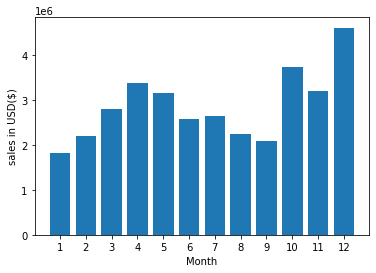

In [12]:
months=range(1,13)
plt.bar(months,results['sales'])
plt.xticks(months)
plt.ylabel('sales in USD($)')
plt.xlabel('Month')
plt.show()

### The question above was to find the month with the best sales. To do that we first had to add a month  and sales column then group-by month and sum.From our graph above we can see that month 12 which is december had the best sales which is not unsual as it is the Christmas season. Also around October we can a slight increase in sales maybe due to the haloween holiday among others.



### Question 2.What city had the highest number of sales

###  1.add a city column

In [14]:
# use .appply()
#get a city from a column
def getcity(address):
    return address.split(',')[1]

#get state due to duplicates in us
def getstate(address):
    return address.split(',')[2].split(' ')[1]
#alldata['City']=alldata['Purchase Address'].apply(lambda x:x.split(',')[1])
alldata['City']=alldata['Purchase Address'].apply(lambda x:getcity(x) + '('+ getstate(x)+')')
#drop a column
#alldata=alldata.drop(columns='Column')
#alldata.drop(columns='Column',inplace=True) #shortway

alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [15]:
results = alldata.groupby('City').sum()
format_dict= {'sales':'${0:,.0f}'}
(results.style.format(format_dict).bar(color='red',vmin=100_000,subset=['sales'],align='zero'))



,Quantity Ordered,Price Each,Month,sales
City,,,,
Atlanta(GA),16602,2779908.200000,104794,"$2,795,499"
Austin(TX),11153,1809873.610000,69829,"$1,819,582"
Boston(MA),22528,3637409.770000,141112,"$3,661,642"
Dallas(TX),16730,2752627.820000,104620,"$2,767,975"
Los Angeles(CA),33289,5421435.230000,208325,"$5,452,571"
New York City(NY),27932,4635370.830000,175741,"$4,664,317"
Portland(ME),2750,447189.250000,17144,"$449,758"
Portland(OR),11303,1860558.220000,70621,"$1,870,732"
San Francisco(CA),50239,8211461.740000,315520,"$8,262,204"


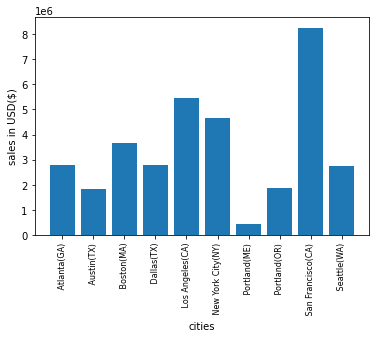

In [16]:
cities= [city for city,df in alldata.groupby('City')] #sort the data according to right sales and city
#cities= alldata['City'].unique()           #=xvalues=unique gets values for a column
plt.bar(cities,results['sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('sales in USD($)')
plt.xlabel('cities')
plt.show()

### The next question was to determine which city had the most sales. Acity column had to be added then group-by city and sum the sales per city. from the graph above, San Francisco had the most number of sales followed closely by Los Angeles. This means demand is high in San francisco and therefore the company should always ensure goods delivered or available on time to retain their largest customers.

## Question 3: what time should we display adverts to maximize likelihood of customer's buying product

In [17]:
##look at order date and convert it to a date time objectorder
alldata['Order Date']=pd.to_datetime(alldata['Order Date'])
alldata['Hour']=alldata['Order Date'].dt.hour
alldata['Minute']=alldata['Order Date'].dt.minute
alldata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA),17,30


### graph

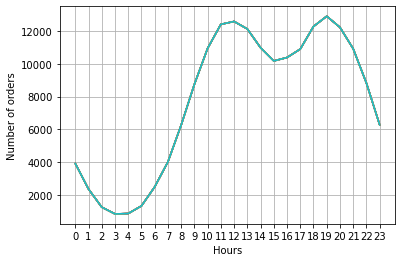

In [18]:
hours=[hour for hour,df in alldata.groupby('Hour') ]
plt.plot(hours,alldata.groupby(['Hour']).count())
plt.xticks(hours)

plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.show()


Graph shows that the best time to advertise is just before 11 am and also before 7.00pm

### To determine the best time to advertise so as to attract more customers, a line graph for hours when certain goods were bought was plotted. From this graph we can clearly see that the best time to advertise is before or just before 11 am as most customers are shopping around that time and also just before 7.00pm as most people are at home probably going through the internet as they rest and shop.

## Question 4. What products are most often sold on their own

In [19]:
#if they have same id look for duplicate ids
dup= alldata[alldata['Order ID'].duplicated(keep=False)]
dup['grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup=dup[['Order ID','grouped']].drop_duplicates()
dup.head()

C:\Users\SYNDIC~1\AppData\Local\Temp/ipykernel_19696/3242693500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['grouped'] = dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [20]:
from itertools import combinations
from collections import Counter

In [21]:
count=Counter()


for row in dup['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    #count.update(Counter(combinations(row_list,3)))
    
count.most_common()
#print(row_list)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

## Question 5. What product sold the most and why?

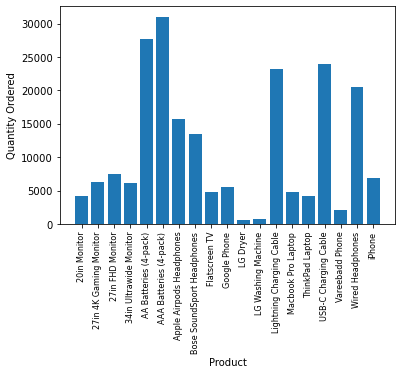

In [23]:
mostproduct= alldata.groupby('Product')
quantityord=mostproduct.sum()['Quantity Ordered']

products= [product for product,df in mostproduct]

plt.bar(products,quantityord)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(products,rotation='vertical',size=8)

plt.show()

C:\Users\SYNDIC~1\AppData\Local\Temp/ipykernel_19696/311338927.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


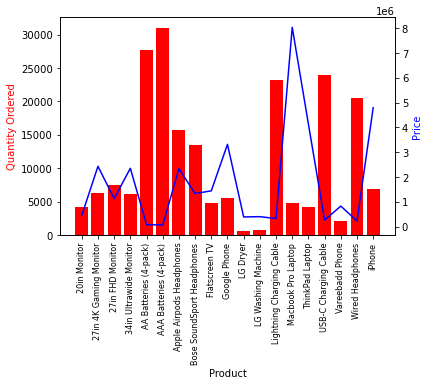

In [34]:
#compare prices to the product to determine if most sold goods relate to their prices

prices=alldata.groupby('Product').sum()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantityord,color='r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

### To determine which products are sold most and why two graphs were plotted. the first graph indicates the most sold goods and from that we can see that AAA batteries and AA batteries are the most sold. the question is why? To answer that another graph was plotted comparing the goods to their prices to determine if their prices are the reasons why some products sell more or less , and from the graph we can see that the AAA and AA bateries are cheap hence most bought compared to the macbook whose prices are low thus not bought as much.
